In [19]:
import pandas as pd
df=pd.read_csv("logdata.csv")
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,0,2023-11-20T08:40:50.664842,WARNING,ServiceA,Performance Warnings,6743,User96,192.168.1.102,28ms
1,1,2023-11-20T08:40:50.672154,DEBUG,ServiceA,File I/O,8684,User17,192.168.1.219,55ms
2,2,2023-11-20T08:40:50.680263,WARNING,ServiceA,Performance Warnings,6265,User13,192.168.1.173,44ms
3,3,2023-11-20T08:40:50.688973,ERROR,ServiceA,Critical Errors,5821,User1,192.168.1.185,72ms
4,4,2023-11-20T08:40:50.697002,ERROR,ServiceB,Critical Errors,7272,User64,192.168.1.194,56ms
...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20T09:04:19.566907,WARNING,ServiceD,Resource Warnings,5111,User22,192.168.1.180,32ms
99996,99996,2023-11-20T09:04:19.583197,FATAL,ServiceC,Data Corruption,3330,User72,192.168.1.49,50ms
99997,99997,2023-11-20T09:04:19.592874,INFO,ServiceD,Startup Messages,5527,User76,192.168.1.223,12ms
99998,99998,2023-11-20T09:04:19.608640,ERROR,ServiceC,Database Errors,4146,User20,192.168.1.80,90ms


In [20]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'LogLevel', 'Service', 'Message',
       'RequestID', 'User', 'ClientIP', 'TimeTaken'],
      dtype='object')

In [21]:
df.isnull()

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [22]:
df.info

<bound method DataFrame.info of        Unnamed: 0                   Timestamp LogLevel   Service  \
0               0  2023-11-20T08:40:50.664842  WARNING  ServiceA   
1               1  2023-11-20T08:40:50.672154    DEBUG  ServiceA   
2               2  2023-11-20T08:40:50.680263  WARNING  ServiceA   
3               3  2023-11-20T08:40:50.688973    ERROR  ServiceA   
4               4  2023-11-20T08:40:50.697002    ERROR  ServiceB   
...           ...                         ...      ...       ...   
99995       99995  2023-11-20T09:04:19.566907  WARNING  ServiceD   
99996       99996  2023-11-20T09:04:19.583197    FATAL  ServiceC   
99997       99997  2023-11-20T09:04:19.592874     INFO  ServiceD   
99998       99998  2023-11-20T09:04:19.608640    ERROR  ServiceC   
99999       99999  2023-11-20T09:04:19.624710    DEBUG  ServiceB   

                    Message  RequestID    User       ClientIP TimeTaken  
0      Performance Warnings       6743  User96  192.168.1.102      28ms  
1  

In [23]:
df.isnull().sum()

Unnamed: 0    0
Timestamp     0
LogLevel      0
Service       0
Message       0
RequestID     0
User          0
ClientIP      0
TimeTaken     0
dtype: int64

In [24]:
df.describe(include='all')

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
count,100000.000000,100000,100000,100000,100000,100000.000000,100000,100000,100000
unique,NaN,100000,5,4,13,NaN,100,254,91
top,NaN,2023-11-20T09:04:19.413252,WARNING,ServiceC,Status Updates,NaN,User14,192.168.1.198,76ms
freq,NaN,1,26181,25200,10094,NaN,1087,451,1170
mean,49999.500000,NaN,NaN,NaN,NaN,5499.406040,NaN,NaN,NaN
std,28867.657797,NaN,NaN,NaN,NaN,2598.164008,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
25%,24999.750000,NaN,NaN,NaN,NaN,3243.000000,NaN,NaN,NaN
50%,49999.500000,NaN,NaN,NaN,NaN,5502.000000,NaN,NaN,NaN
75%,74999.250000,NaN,NaN,NaN,NaN,7756.000000,NaN,NaN,NaN


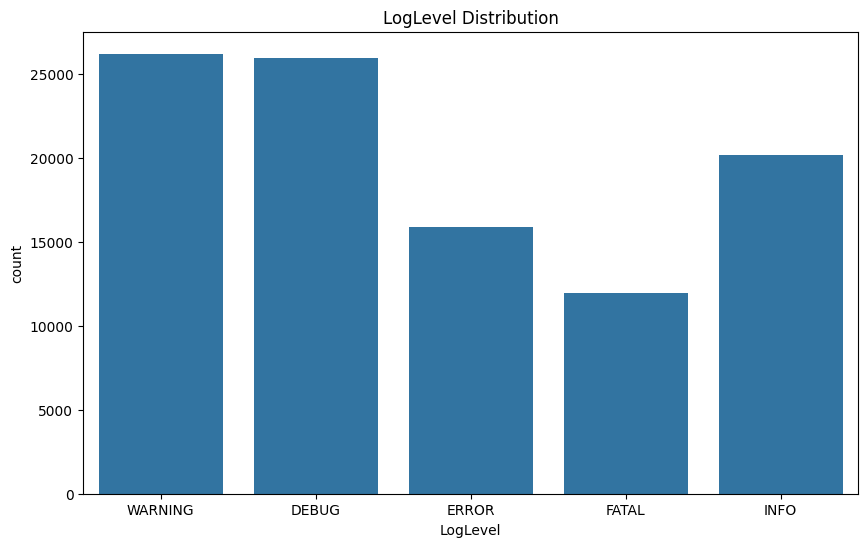

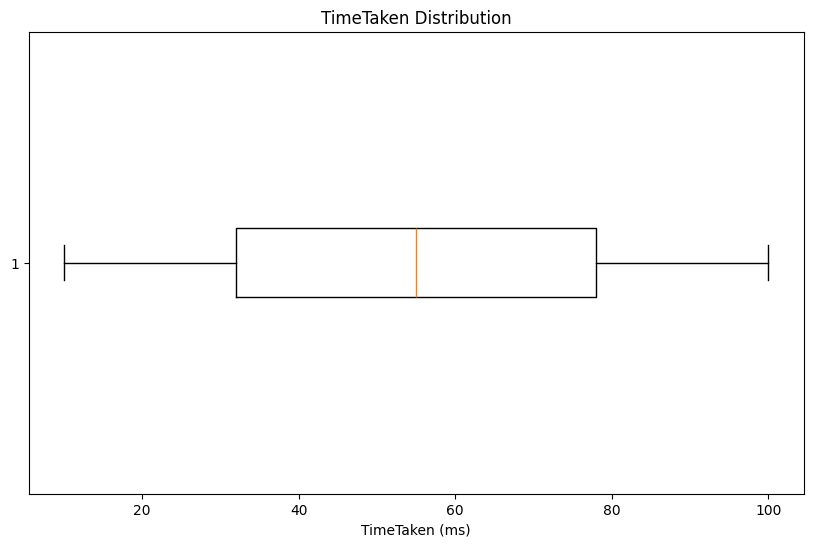

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='LogLevel', data=df)
plt.title('LogLevel Distribution')
plt.show()
plt.figure(figsize=(10, 6))
df['TimeTaken'] = pd.to_numeric(df['TimeTaken'].str.replace('ms', ''), errors='coerce')
plt.boxplot(df['TimeTaken'].dropna(), vert=False)
plt.title('TimeTaken Distribution')
plt.xlabel('TimeTaken (ms)')
plt.show()


In [27]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,0,2023-11-20 08:40:50.664842,WARNING,ServiceA,Performance Warnings,6743,User96,192.168.1.102,28
1,1,2023-11-20 08:40:50.672154,DEBUG,ServiceA,File I/O,8684,User17,192.168.1.219,55
2,2,2023-11-20 08:40:50.680263,WARNING,ServiceA,Performance Warnings,6265,User13,192.168.1.173,44
3,3,2023-11-20 08:40:50.688973,ERROR,ServiceA,Critical Errors,5821,User1,192.168.1.185,72
4,4,2023-11-20 08:40:50.697002,ERROR,ServiceB,Critical Errors,7272,User64,192.168.1.194,56
...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 09:04:19.566907,WARNING,ServiceD,Resource Warnings,5111,User22,192.168.1.180,32
99996,99996,2023-11-20 09:04:19.583197,FATAL,ServiceC,Data Corruption,3330,User72,192.168.1.49,50
99997,99997,2023-11-20 09:04:19.592874,INFO,ServiceD,Startup Messages,5527,User76,192.168.1.223,12
99998,99998,2023-11-20 09:04:19.608640,ERROR,ServiceC,Database Errors,4146,User20,192.168.1.80,90


In [28]:
from sklearn.preprocessing import LabelEncoder
label={}
for i in ['LogLevel', 'Service','User']:
     if i in df.columns:
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i].astype(str))
        label[i]=le

In [29]:
df['hour']=df['Timestamp'].dt.hour


In [30]:
df.head()

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken,hour
0,0,2023-11-20 08:40:50.664842,4,0,Performance Warnings,6743,96,192.168.1.102,28,8
1,1,2023-11-20 08:40:50.672154,0,0,File I/O,8684,9,192.168.1.219,55,8
2,2,2023-11-20 08:40:50.680263,4,0,Performance Warnings,6265,5,192.168.1.173,44,8
3,3,2023-11-20 08:40:50.688973,1,0,Critical Errors,5821,0,192.168.1.185,72,8
4,4,2023-11-20 08:40:50.697002,1,1,Critical Errors,7272,61,192.168.1.194,56,8


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
if 'Message' in df.columns:
    vectorizer=TfidfVectorizer(max_features=100)
    msg_vector=vectorizer.fit_transform(df['Message'].fillna(""))
    msg_feature=pd.DataFrame(msg_vector.toarray())
    feature_data = pd.concat([df[['LogLevel', 'Service', 'TimeTaken', 'hour']].reset_index(drop=True), msg_feature], axis=1)
else:
    feature_data = df[['LogLevel', 'Service', 'TimeTaken', 'Hour']]

In [32]:

feature_data.columns = feature_data.columns.astype(str)

In [33]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(feature_data.dropna())
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken,hour,Anomaly_Score
0,0,2023-11-20 08:40:50.664842,4,0,Performance Warnings,6743,96,192.168.1.102,28,8,1
1,1,2023-11-20 08:40:50.672154,0,0,File I/O,8684,9,192.168.1.219,55,8,1
2,2,2023-11-20 08:40:50.680263,4,0,Performance Warnings,6265,5,192.168.1.173,44,8,1
3,3,2023-11-20 08:40:50.688973,1,0,Critical Errors,5821,0,192.168.1.185,72,8,1
4,4,2023-11-20 08:40:50.697002,1,1,Critical Errors,7272,61,192.168.1.194,56,8,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 09:04:19.566907,4,3,Resource Warnings,5111,15,192.168.1.180,32,9,1
99996,99996,2023-11-20 09:04:19.583197,2,2,Data Corruption,3330,70,192.168.1.49,50,9,-1
99997,99997,2023-11-20 09:04:19.592874,3,3,Startup Messages,5527,74,192.168.1.223,12,9,1
99998,99998,2023-11-20 09:04:19.608640,1,2,Database Errors,4146,13,192.168.1.80,90,9,1


In [34]:
print("\nAnomaly Distribution:\n", df['Anomaly_Score'].value_counts())



Anomaly Distribution:
 Anomaly_Score
 1    95003
-1     4997
Name: count, dtype: int64


In [35]:
if 'LogLevel' in label and 'Critical' in label['LogLevel'].classes_:
    critical_label = label['LogLevel'].transform(['Critical'])[0]
    critical_anomalies = anomalies[anomalies['LogLevel'] == critical_label]
    plt.figure(figsize=(12, 6))
    plt.scatter(critical_anomalies['Timestamp'], np.ones_like(critical_anomalies['Timestamp']), c='red', label='Critical Threats', alpha=0.7)
    plt.xlabel('Timestamp')
    plt.ylabel('Threat Indicator')
    plt.title('Critical Cybersecurity Threats Over Time')
    plt.legend()
    plt.show()
else:
    print("No 'Critical' LogLevel detected in data.")

No 'Critical' LogLevel detected in data.
